# Wildflower germination

> Every species has some mechanism for delaying germination until after the seed has been dispersed. The Science of Seed Germination is the discovery and description of such mechanisms and the development of procedures for removing them so that the seeds can germinate. - Norman C. Deno

Wildflowers have a wide range of germination conditions. This experiment tests which of 83 wildflower species collected from the region germinate under "household" conditions, that is kept moist at 20 degrees Celsius, and exposed to the moderate light from a large easterly facing window and houselights. The results are compared against three reference sources for germination instructions.

The goal of this experiment was to keep things relatively simple in order to test a wildflower protocol that could be implemented by introductory educational programs and citizen science and contribute to knowledge of local wildflowers, specifically, the young adult/teenage clients of Port-34, a professional integration program for youths. Ideally these experiments should focus on species that have no known value and may not even be the most "aesthetically pleasing" but are nonetheless invaluable components of our local ecosystems.

In [1]:
# Final notebook for the 2021 germination project

# Import standard packages and files

# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import utility file

import botany_utilities as bot

# import germination data

ger=pd.read_csv("resources/germ_data.csv")
ger["pdate"] = pd.to_datetime(ger['pdate'], errors='coerce', format='%d/%m/%y')

## Methodology &#128297; 

As stated, the goal of this experiment was to test which of the 83 species would germinate at 25 degrees Celsius without cold stratification or physical scarring. This experiment was not to identify optimal germination scenarios identifying germination rates per se, but to give a yes/no indicator as to whether germinating these seeds is feasible undet the below enumerated "household" conditions without any preparation.

### Choice and source of seeds
The seeds were chosen opportunistically among native wildtype species within either the personal collection of Gabrial Erismann or the inventory of Port 34. The choice of seeds reflected several criteria:
* some were chosen to represent a specific and ecologically interesting biotope near Biel
* some older seeds (<2018) were chosen simply because they were on hand
* some ripe seeds were harvested around Biel and La Chaux-de-Fonds at the beginning of the experiment.

### Seed quantity
The quantities used were classified into "full", "moderate" and "small" and the number of seeds used varied widely. In one case only 8 seeds were used, while in another case perhaps as many as 300 seeds were used. This is because of the different sources and age of the seeds. Older seeds that were harvested in 2015-2016 were in general used in higher quantities.

### Experiment timing
The experiment ran from the 12th of October to the 28th of November. The final planting of seeds occured on the 23rd of October.

This experiment attemps to answer the question of whether a given amount of seeds yields "no germination" "low germination", "moderate germination" and "high germination." As an initial investigation into seed germination, it was decided to keep the methodology as simple as possible. During October seeds were planted and monitored until the final week of November.

### Germination medium
The germination medium used was the following mix (all certified organic):
* 1/3 coconut coir
* 1/3 sand
* 1/3 seedling dirt from Coop OECO plan brand

The mix was placed into either plastic seedling trays or concrete germination trays. This mix was chosen after research and discussions concluded that this was a reasonable medium with the following useful properties:
* simple and available with organic certification
* stays moist without becoming waterlogged. 
* thick enough medium that seeds can be buried and thus exposed to darkness at the same time as other seeds can be left at the surface of the medium for light exposure.
* does not require instant transplanting the moment seedlings germinate
 
 ### Watering protocol
For the first three weeks, the seedlings were watered via spray bottle twice a day depending on the drynesss of the growing medium. This protocol was decided for the following reasons:
* minimize mess in appartment setting
* simulate wind and thus strengthen leggy sprouts
* minimize impact of watering on the germination medium

For the week starting November 1st, the water methodology was changed to the following:
* The seedlings would be sprayed every day, but with less water.
* The trays were watered every two days with a watering can over a freshly sprayed surface. Although this altered the germination medium somewhat, it allowed the deeper portions to remain moist for proper root formation.

This resulted in some seedling loss as it did not keep the medium dry enough due to the indoor heating system and the protocol was amended to watering every day.

### Light exposure
The goal of the experiment was to test for the appartment conditions, not for exposure to light. As such, for each species, half of the seeds were left exposed to light on the surface and half of seeds were buried up to 2 cm below the surface of the germination medium, thus exposed to darkness. The seeds were placed into two locations, both exposed to the following sources of light:
1) Indirect and direct sunlight through a medium sized south-east and a large south-west facing window. 
2) Standard household fluorescent lighting used to light up the room
3) Direct exposure to 3-4 hours of sunlight on sunny, warm afternoons when possible (on about 4 occasions).

### Temperature
The temperature was kept at a constant of around 20-22 degrees Celsius due to the location of the germination trays directly above heating units. During the sunny afternoons the plants were exposed to a bit lower temperatures at short intervals which may have affected the germination rates.

### Data collection
Data was collected in two different ways with a goal of minimizing time spent counting sprouts. 
- For species planted in concrete containers, the sprouts were counted at regular intervals. Once sprouts reached a certain saturation point, the tray was considered "full". The sprouts were no longer counted until November 28th in order economize on time spent counting sprouts.
- For species planted in plastic containers, the number of cells with sprouts was counted. See the below image and description for an example. On November 28th all sprouts were counted. 

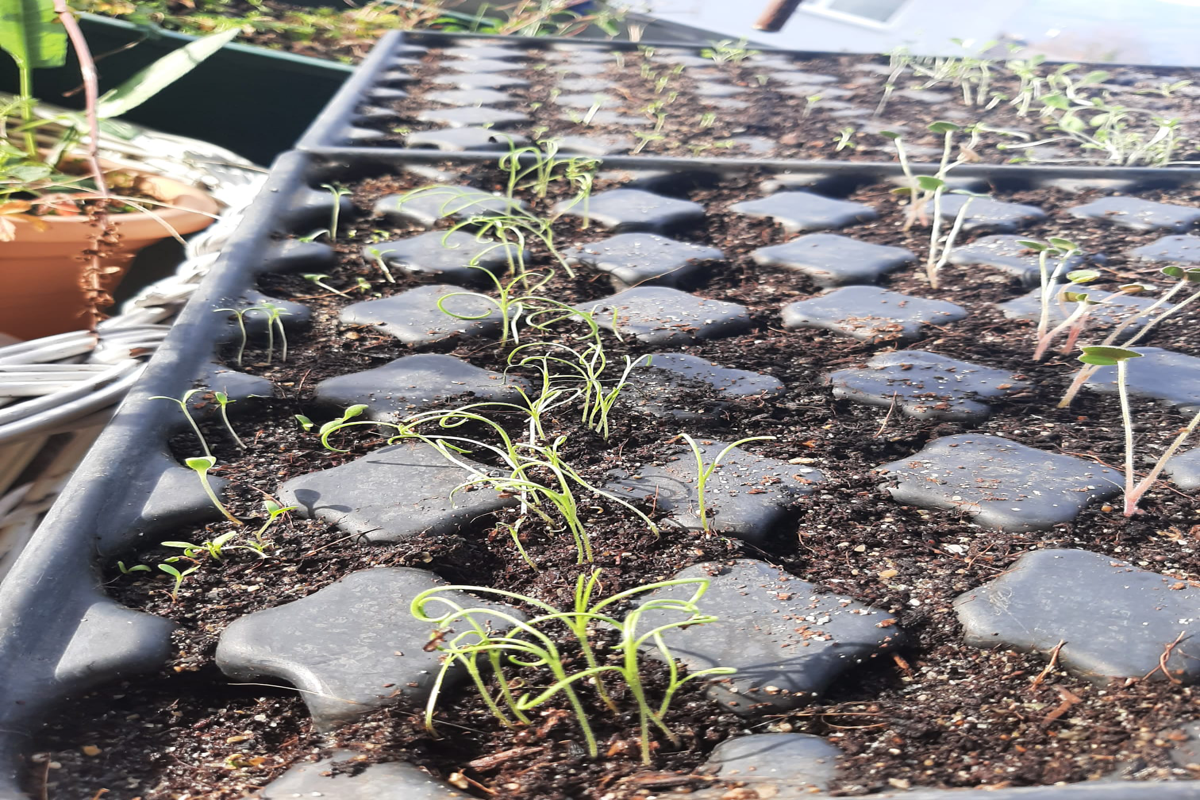

In [2]:
animage = bot.display_image_ipython("resources/images/germ-1.jpeg", thumb=(1200,800), rotates=0)
display(animage)

*__Figure 1 :__ Each row was planted with one species and the number of cells with sprouts were counted. In this case the cells on the left would have 5/7 cells sprouted, the next row of cells has 7/7 and the next row of cells has 0/7. On November 28th, the final day of the experiment, all of the sprouts in each row were counted rather than the cells to make the counts directly comparable to the counts of the concrete containers.*

## Results &#127808; 
Most seeds germinated, with a large variability in the amount of sprouts. The concrete containers and the plastic containers demonstrated similar germination rates based on the results of the full count on November 28th 2022. About 1/3 of the species could be considered to have "not germinated", defined below, and about half of the species could be defined as successfully germinated, again defined below.

### Cut-off values for successful germination
In order to determine succesful germination, a cut-off value had to be defined above which a species is "succesful" and below which a species is "unsuccesful". This value depends on the purpose - if the goal is to determine whether any sprouts germinate then the cutoff should be close to 0. If the purpose is to grow them with a maximum return then a higher germination rate would be needed for "success". The below charts demonstrate the number of succesfully (and unsuccesfully) germinated species based on changing cut-off values.

In [3]:
## convert the csv data into useable data for graphing.

## make density values

# the original density values were under reported for these species - note the germination rate is above 1
h = ['dianthus-carthusianorum', 'silene-flos-cuculi',
       'veronica-teucrium']

# assign numerical values to qualitative measurement of number of seeds planted
n = ["full", "moderate", "small"]
#for i,undercounted in enumerate(h):
#    ger.loc[ger.species == undercounted, 'density'] = n[i]
new_densities = {"full":100, "moderate":50, "small":20}
ger["density"] = ger.density.map(lambda x: new_densities[x])


# sprouted is the max of the weekly counts
counts = ['2021-10-10', '2021-10-12', '2021-10-14',
     '2021-10-16', '2021-10-18', '2021-10-20', '2021-10-22', '2021-10-24',
     '2021-10-26', '2021-10-28', '2021-10-30', '2021-11-03', '2021-11-10',
     '2021-11-18', '2021-11-23', '2021-11-28']

ger["sprouted"] = ger[counts].max(axis=1)

# the germination rate is the sprouted/density
ger["rate"] = ger.sprouted/ger.density

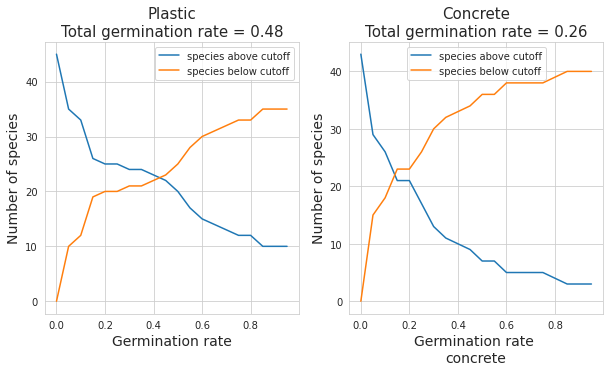

In [4]:
## Prepare records for the cutoff charts

# concrete contatiners
conc = ger.loc[ger.container == "concrete-container"].copy()

# define columns to display
coffs = ["rate", "species_below_cutoff", "species_above_cutoff"]
display_columns = ["origin","species", "density", "sprouted", "rate"]

# array to hold values
cutoffs_concrete = [coffs]

# count the number of species above and below the specified increment
for i in np.arange(0,1, step=.05):
    concfew = conc[conc["rate"] < i].copy()
    concmany = conc[conc["rate"] >= i].copy()
    a = [i,concfew.species.nunique(),concmany.species.nunique()]
    cutoffs_concrete.append(a)

# the overall germination rate
cugerm = conc.sprouted.sum()/conc.density.sum()

ngermination_rates_c = pd.DataFrame(cutoffs_concrete[1:], columns=cutoffs_concrete[0])

# plastic containers
p = ger.loc[ger.container == "plastic-tray"].copy()

# array to hold values
cutoffs_plastic = [coffs]

# count the number of species above and below the specified increment
for i in np.arange(0,1, step=.05):
    pfew = p[p["rate"] < i].copy()
    pmany = p[p["rate"] >= i].copy()
    a = [i,pfew.species.nunique(),pmany.species.nunique()]
    cutoffs_plastic.append(a)

# the overall germination rate
plasticgerm = p.sprouted.sum()/p.density.sum()

ngermination_rates_p = pd.DataFrame(cutoffs_plastic[1:], columns=cutoffs_plastic[0])


sns.set_style("whitegrid")
Fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.lineplot(data=ngermination_rates_p, x="rate", y="species_above_cutoff", ax=ax1, label="species above cutoff")
sns.lineplot(data=ngermination_rates_p, x="rate", y="species_below_cutoff", ax=ax1, label="species below cutoff")
ax1.set_ylabel("Number of species", fontsize=14)
ax1.set_xlabel("Germination rate", fontsize=14)
ax1.set_title(f"Plastic\nTotal germination rate = {np.round(plasticgerm,2)}", fontsize = 15)

# plot the data
sns.lineplot(data=ngermination_rates_c, x="rate", y="species_above_cutoff", ax=ax2, label="species above cutoff")
sns.lineplot(data=ngermination_rates_c, x="rate", y="species_below_cutoff", ax=ax2, label="species below cutoff")

# axis labels and styles
ax2.set_xlabel("Germination rate \nconcrete", fontsize=14)
ax2.set_ylabel("Number of species", fontsize=14)
ax2.set_title(f"Concrete\nTotal germination rate = {np.round(cugerm,2)}", fontsize = 15)
ax2.legend(loc = "upper center")

plt.show()

*__Figure 2:__ Overall germination rate of the plastic concrete containters and the number of species above and below different germination cut-off rates from 0 to 1 on a .05 increment*

The seeds were sourced from two collections: either Port 34 (mainly their old seeds) or from my own collection from 2020 and 2021 of seeds from around Biel. The rate was higher in plastic containers for both groups and similar overall.

In [5]:
# germination rate by origin for concrete containers
by_species=conc.groupby(["species"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_species["rate"] = by_species.sprouted/by_species.density

# germination rate by species collection (concrete)
by_origin=conc.groupby(["collection"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_origin["rate"] = by_origin.sprouted/by_origin.density
by_origin["container"] = "concrete"

# germination rate by origin for plastic containers
by_species_p=p.groupby(["species"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_species_p["rate"] = by_species_p.sprouted/by_species_p.density

# germination rate by species collection (plastic)
by_origin_p=p.groupby(["collection"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_origin_p["rate"] = by_origin_p.sprouted/by_origin_p.density
by_origin_p["container"] = "plastic"

# put both of them together and display
by_origin_total = pd.concat([by_origin_p,by_origin])
by_origin_total = by_origin_total.reset_index(drop = True)
by_origin_total

collection  density  sprouted      rate container
0   personal     1170       628  0.536752   plastic
1    port 34     2110       936  0.443602   plastic
2   personal     1120       254  0.226786  concrete
3    port 34     2300       622  0.270435  concrete

*__Figure 3:__ Approximate number of seeds planted, sprouts and rate broken down by conatiner and by seed collection.*

It is likely that the age of the seeds may have affected germination. At the time of planting seeds chosen to be planted were a bit random. My personal collection featured more fresh seeds and the Port 34 collection featured more old seeds. However, for many species seeds can store for decades or even centuries, especially if stored in a cool, dry, dark protected environment like the seed storage area of Port 34.

In [6]:
# Germination rate by year (coly)

#obtain datasets
by_year_conc = conc.groupby(["coly"], as_index = False).agg({"density":"sum", "sprouted":"sum","species":"count"})
by_year_p = p.groupby(["coly"], as_index = False).agg({"density":"sum", "sprouted":"sum","species":"count"})

#calculate rate
by_year_p["rate"] = by_year_p.sprouted/by_year_p.density
by_year_conc["rate"] = by_year_conc.sprouted/by_year_conc.density

#add identifying column
by_year_p["container"] = "plastic"
by_year_conc["container"] = "concrete"

#combine into 1 dataframe, sort by year, reset index, display
by_year_total = pd.concat([by_year_p,by_year_conc])
by_year_total = by_year_total.sort_values(by = "coly")
by_year_total = by_year_total.reset_index(drop = True)
by_year_total

coly  density  sprouted  species      rate container
0   2015      300        71        3  0.236667   plastic
1   2015      800       149        9  0.186250  concrete
2   2016      100       100        1  1.000000   plastic
3   2016      200       101        2  0.505000  concrete
4   2018      100         8        1  0.080000   plastic
5   2019      790       330       11  0.417722   plastic
6   2019      300        60        3  0.200000  concrete
7   2020      720       377       11  0.523611   plastic
8   2020      770       315       11  0.409091  concrete
9   2021     1170       628       17  0.536752   plastic
10  2021     1350       251       19  0.185926  concrete
11     x      100        50        1  0.500000   plastic

__Figure 4:__ Seeds planted and sprouted by year and by container.

### No germination &#127810; 
Out of all of the species planted, only 8 (5 in concrete containers, 3 in plastic containers) of them, or 10%, had no sprouts. Although seeds were separated by physical barriers, it is likely a small amount of contamination occured between growing areas. They were after all planted in the same containers side by side, and as such it can be expected that gust of wind or some shifting dirt, or a mistake when sowing the seeds could have reuslted in some contamination between cells. Another 11% of species only had one sprout (4 in concrete containers, 5 in plastic containers), and another 12% on top of that (6 in concrete containers, 3 in plastic containers) only had two sprouts. Thus 29 species, or 35% of those planted, could reasonably be classified as "no germination / likely contaminated". 

In [7]:
## Species with no germination

# pull out the species that had a rate of 0 for concrete containers
a = by_species[by_species.rate == 0].copy()

# add identifier column
a["container"] = "concrete"

# pull out the species that had a rate of 0 for concrete containers
b = by_species_p[by_species_p.rate == 0].copy()

# add identifier column
b["container"] = "plastic"

# combine dataframes
c = pd.concat([a,b])

# drop unneeded column and reset index
c = c.drop(columns =["density"])
c = c.reset_index(drop = True)
c

species  sprouted  rate container
0  campanula-rapunculoides         0   0.0  concrete
1             geum-urbanum         0   0.0  concrete
2         salvia-pratensis         0   0.0  concrete
3      scabiosa-columbaria         0   0.0  concrete
4    valeriana-officinalis         0   0.0  concrete
5     anthyllis-vulneraria         0   0.0   plastic
6            silene-nutans         0   0.0   plastic
7    valeriana-officinalis         0   0.0   plastic

*__Figure 4:__ Species that did not germinate at all, note the Valeriana officinalis planted twice*

In [8]:
data = ger.loc[ger.sprouted.isin([0,1,2])].copy()
no_germination = data.set_index(["container", "species"])
no_germination["sprouted"]

container           species                 
plastic-tray        anthyllis-vulneraria        0
                    valeriana-officinalis       0
                    sanguisorba-officinalis     1
                    silene-nutans               0
                    papaver-somniferum          1
                    primula-veris               2
                    rhinanthus-sp.              2
                    verbascum-densiflorum       2
                    aruncus-dioicus             2
                    epilobium-dodonaie          1
concrete-container  helianthemum-nummularium    2
                    verbena-officinalis         2
                    geum-urbanum                0
                    epilobium-dodonaie          1
                    salvia-pratensis            0
                    viola-sp                    2
                    levisticum-officinale       1
                    scabiosa-columbaria         0
                    valeriana-officinalis       0
     

*__Figure 5:__ Species that had fewer than 3 sprouts, "no germination"* 

### High germination &#127807; 
The plastic containers had a signficcantly higher number of seeds with a high germination rate (20/45 species  comparied to 7/43 species) for concrete containers. In the concrete containers, the cut-off for very succesful was set to 50% germination or higher. Based on this metric, 7 species achieved high germination. One speculated reason for this is the concrete containers had a high proportion of species collected fresh in September and October, species which are more likely require cold stratification during the imminent cold season than the group of species selected randomly for the plastic containers.

In [9]:
#Grab the top ten germinating values for concrete containers
a = by_species.sort_values(by="rate", ascending=False)[:10]
# add identifier column
a["container"] = "concrete"

#Grab the top ten germinating values for plastic containers
b = by_species_p.sort_values(by="rate", ascending=False)[:10]
# add identifier column
b["container"] = "plastic"

#combine the species together
c = pd.concat([a,b])
#drop unwanted column, sort according to rate, and reset the index.
c = c.drop(columns =["density"])
c = c.sort_values(by = "rate", ascending = False)
c = c.reset_index(drop = True)
c

species  sprouted  rate container
0   dianthus-carthusianorum       100  2.00   plastic
1         veronica-teucrium        80  1.60   plastic
2        silene-flos-cuculi        30  1.50   plastic
3       trifolium-campestre        55  1.10   plastic
4         cichorium-intybus       100  1.00  concrete
5          potentilla-recta       100  1.00   plastic
6          origanum-vulgare       100  1.00   plastic
7        anthemis-tinctoria       100  1.00   plastic
8   artemisia-umbelliformus       100  1.00   plastic
9          verbascum-nigrum       100  1.00   plastic
10    lavendula-officinalis       100  1.00  concrete
11     hypericum-perforatum        50  1.00  concrete
12      verbascum-lychnitis       100  1.00   plastic
13          silene-arvensis        42  0.84  concrete
14       anthemis-tinctoria        75  0.75  concrete
15            felseck-grass        60  0.60  concrete
16      teucrium-chamaedrys        28  0.56  concrete
17      plantago-lanceolata        48  0.48  concrete
18         verbascum-nigrum        46  0.46  concrete
19              malva-alcea        42  0.42  concrete

*__Figure 6:__ The ten species with the highest germination rate each in plastic containers and in concrete containers, sorted by rate*

## Comparison to expert opinion &#128300;
Three germination references were used to make a composite recomendation value on the likelihood of each species to germinate under these conditions. The reccomendations were not always straightforward to classify into "yes" or "no", particularly from the Naturnahe book. Nonetheless, this was done for all seeds with entries in the following sources:
- Sylvan Seeds, a compilation of germination studies on temperate forest species [Database here](https://efernandezpascual.shinyapps.io/sylvanseeds/)
- Directions provided by Port-34's master gardener [Garden website](https://www.equipe-volo.ch/de/dienstleistungen-produkte/unsere-dienstleistungen-produkte/gaertnerei/)
- Instructions in the book [Naturnah gärtnern](https://www.haupt.ch/buecher/natur-garten/naturnah-gaertnern.html)


In [10]:
# the columns in the df that hold the recomendations
rcmndrs = ["recs","recn","recp"]

experts = ger.copy()

# remove species that are data deficient for all expert opinions
# dd implies the seds were only identified to the genus level and thus could not have a species germination reccomendation from these sources
onlyexperts = experts[(experts.recs != "dd") & (experts.recn != "dd") & (experts.recp != "dd")].copy()

# the data to work off
experts_display = onlyexperts[["collection","species", "density",*rcmndrs, "sprouted", "rate", "container"]].copy()

# if the expert recomendations were in agreement with the provided germination environment
# assign True, else assign False for each column
for recomender in rcmndrs:
    experts_display[recomender] = experts_display[recomender] == "yes"

# add up the number of positive recomendations for each species and store in exp_score column
experts_display["exp_score"] = experts_display[rcmndrs].sum(axis=1)

# some species were planted in two different styles of container
# they should only be included on the experts review one time.
# the results from both concrete and plastic containers should be considered.
experts_display =experts_display.drop_duplicates("species").copy()

# assign true for species that appear more than once, else false
more_than_one = ger["species"].value_counts() > 1

# gather all species with true values
combine = more_than_one[more_than_one==1]

# get the relvant records from the initial dataset
c = onlyexperts.loc[onlyexperts.species.isin(combine.index)]

# combine the values for each species under the different container variables
cdoubles = c.groupby(["species"], as_index=False).agg({"sprouted":"sum", "density":"sum", "rate":"sum"})

# update the experts ratings with these combined values:
for a_species in combine.index:
    # get the combined values
    newdf = cdoubles[cdoubles.species==a_species]
    sprouted = newdf.sprouted.sum()
    density = newdf.density.sum()
    # replace the values in the aggregated table
    experts_display.loc[experts_display.species == a_species, "sprouted"] = sprouted
    experts_display.loc[experts_display.species == a_species, "density"] = density

# update the "rate" column    
experts_display["rate"] = experts_display.sprouted/experts_display.density

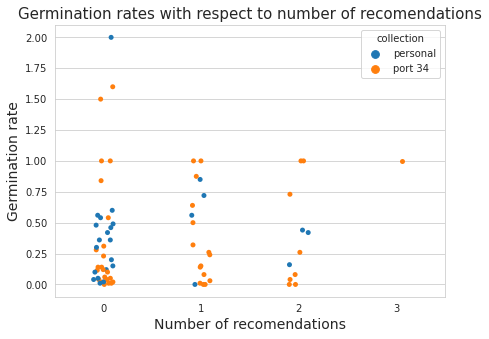

In [11]:
fig, ax = plt.subplots(figsize=(7,5))

sns.stripplot(data=experts_display, x = "exp_score", y="rate", hue="collection",ax=ax)
ax.set_ylabel("Germination rate", fontsize=14)
ax.set_xlabel("Number of recomendations", fontsize=14)
ax.set_title("Germination rates with respect to number of recomendations", fontsize = 15)

plt.show()

*__Above:__ Plot of the germination rates by number of recomendations*

In [12]:
# germination rate and number of species with each expert score
experts_display.groupby(["exp_score"], as_index=False).agg({"rate":"mean", "species":"nunique"})

exp_score      rate  species
0          0  0.359186       43
1          1  0.388158       19
2          2  0.375455       11
3          3  1.000000        1

*__Above:__ Average germination rate by number of recomendations*

*__Below:__ The species that had two positive recomendations, ie.. score = 2*

In [13]:
cols_of_i = ["species", *rcmndrs, "rate", "exp_score"]

# get records with two positive recs
two_opinions = experts_display[experts_display.exp_score == 2].copy()

#grab relevant columns within records with two positive recs, reset index, display
two_opinions[cols_of_i[:]]
two_opinions.reset_index(drop = True)
two_opinions

collection                   species  density   recs   recn   recp  \
0    personal       trifolium-campestre      150   True   True  False   
4    personal         medicago-lupulina       50   True   True  False   
8    personal             silene-dioica       50   True  False   True   
14    port 34     valeriana-officinalis      150   True   True  False   
19    port 34          verbascum-nigrum      200  False   True   True   
46    port 34        geranium-sanguieum       50  False   True   True   
47    port 34  helianthemum-nummularium       50   True   True  False   
51    port 34      hypericum-perforatum       50   True   True  False   
53    port 34         cichorium-intybus      100  False   True   True   
56    port 34       geranium-sylvaticum       50  False   True   True   
60    port 34              geum-urbanum      100   True   True  False   

    sprouted  rate           container  exp_score  
0         63  0.42        plastic-tray          2  
4          8  0.16        plastic-tray          2  
8         22  0.44        plastic-tray          2  
14         0  0.00        plastic-tray          2  
19       146  0.73        plastic-tray          2  
46        13  0.26        plastic-tray          2  
47         2  0.04  concrete-container          2  
51        50  1.00  concrete-container          2  
53       100  1.00  concrete-container          2  
56         4  0.08  concrete-container          2  
60         0  0.00  concrete-container          2

*__Below:__ The germination rate for each recomender*

In [14]:
# get the germination rate for individual recommenders
data = experts_display
melted_display = experts_display.melt(id_vars="species", value_vars=rcmndrs)

melted_display.rename(columns={"variable":"recomender", "value":"recomended"}, inplace=True)

my_recomendations = []
for recomender in rcmndrs:
    rcmndr_rates = data.loc[data[recomender] == True][["species", "rate"]].set_index("species")
    a_group = (melted_display.recomender == recomender)&(melted_display.recomended == True)
    recn_recs = melted_display[a_group].copy()
    recn_recs["rate"] = recn_recs.species.map(lambda x: rcmndr_rates.loc[x].rate)
    my_recomendations.append(recn_recs.values)

my_recs = np.concatenate(my_recomendations)
results_r=pd.DataFrame(my_recs, columns=[*melted_display.columns, "rate"])

results_r.groupby("recomender", as_index=False).agg({"species":"nunique", "rate":"median"})

recomender  species  rate
0       recn       27  0.26
1       recp        8  0.35
2       recs        9  0.42

*__Figure 6:__ Table of recomendations from experts with the a. the total number of sprouts in that category on November 28th, b. the number of species above the cutoff and c. the total number of species with that recomendation category. Mixed recomendations implies at least one yes and at least one no from the 3 sources. Note that species did well across the board. The cutoff figure used is 10 sprouts on November 28th.* 

## Conclusion 
In conclusion, this experiment tested the feasibility of germinating a number of wild type, native flower seeds in an appartment setting with no equipment beyond appropriate medium and containers. The main result is that a number of seeds germinated succesfully and that little is needed to germinate a signficant portion of a semi-randomly selected batch of wildflower seeds. It is recomended to germinate fewer seeds and to count them methodically in order to come up with specific germination rates. While the shortcuts taken nonetheless answer the broad question of whether germinating the seeds indoors is feasible, information on the rates is needed for comparison with scientific literature.

The expected next step would be test the germination potential of a small number of fresh seeds for different species as they are collected in Biel/Bienne throughout the course of the 2022 surveys. 